<a href="https://colab.research.google.com/github/hacarra/crypto-alphabet/blob/main/Copy_of_2V_2021_vs_Plebiscito_1988.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'xtick.labelsize' : 15,
                     'ytick.labelsize' : 15})

In [ ]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/alonsosilvaallende/COVID-19/master/data/Eleccion_presidencial_2021_por_comuna.csv", header=1, thousands=".")
df_raw.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Mesas escrutadas,Mesas totales,Padrón,Boric,Kast,Provoste,Sichel,Artés,MEO,Parisi,Válidos,Nulos,En blanco,Total,Mesas escrutadas.1,Mesas totales.1,Boric.1,Kast.1,Válidos.1,Nulos.1,En blanco.1,Total.1,Mesas instaladas,Mesas totales.2,Padrón.1,ChV,Lavín,Briones,Sichel.1,Desbordes,AD,Boric.2,Jadue,Válidos.2,Nulos.2,En blanco.2,Total.2,Apruebo,Rechazo,Nulos.3,En blanco.3,Sí,No,Nulos y en blanco,Notas
0,5,Algarrobo,5602,43,43,14805,1978,2877,817,1352,90,472,568,8154,43,20,8217,43,43,4580,5096,9676,61,23,9760,21,21,14100,2044,739,206,891,208,1917,1299,618,3961,34,1,3996,4932,2118,23,13,2159.0,1172.0,80.0,NaN
1,13,Alhué,13502,21,21,6118,636,467,520,320,31,151,357,2482,19,16,2517,21,21,1952,1092,3044,9,9,3062,11,11,6045,293,80,23,165,25,494,268,226,787,10,2,799,2323,309,7,1,1077.0,1079.0,67.0,NaN
2,8,Alto Biobío,8314,19,19,5583,377,502,399,155,40,119,255,1847,81,80,2008,19,19,1283,1069,2352,48,20,2420,10,10,5463,201,133,20,33,15,159,82,77,360,16,4,380,1269,424,69,43,NaN,NaN,NaN,NaN


In [ ]:
df_RM = df_raw[df_raw['Unnamed: 0'] == '13']
df_RM.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Mesas escrutadas,Mesas totales,Padrón,Boric,Kast,Provoste,Sichel,Artés,MEO,Parisi,Válidos,Nulos,En blanco,Total,Mesas escrutadas.1,Mesas totales.1,Boric.1,Kast.1,Válidos.1,Nulos.1,En blanco.1,Total.1,Mesas instaladas,Mesas totales.2,Padrón.1,ChV,Lavín,Briones,Sichel.1,Desbordes,AD,Boric.2,Jadue,Válidos.2,Nulos.2,En blanco.2,Total.2,Apruebo,Rechazo,Nulos.3,En blanco.3,Sí,No,Nulos y en blanco,Notas
1,13,Alhué,13502,21,21,6118,636,467,520,320,31,151,357,2482,19,16,2517,21,21,1952,1092,3044,9,9,3062,11,11,6045,293,80,23,165,25,494,268,226,787,10,2,799,2323,309,7,1,1077.0,1079.0,67.0,NaN
14,13,Buin,13402,253,253,78010,10500,11636,3809,4609,513,3199,5237,39503,481,132,40116,253,253,26268,20392,46660,358,105,47123,85,85,75070,7412,2181,664,3900,667,9787,6230,3557,17199,275,22,17496,33238,7166,124,59,14148.0,12753.0,643.0,NaN
23,13,Calera de Tango,13403,67,67,22524,2586,3596,1067,1693,115,693,754,10504,59,40,10603,67,67,7141,7135,14276,107,45,14428,34,34,22134,3090,939,370,1572,209,2902,2026,876,5992,88,13,6093,9352,3340,41,17,3431.0,2709.0,113.0,NaN


In [ ]:
import seaborn as sns

sns.set_style('white')
sns.set_style('ticks')

In [ ]:
df_RM = df_RM.rename(columns={"Unnamed: 1":"comunas"})
df_RM = df_RM.set_index("comunas")
df_RM = df_RM.fillna(0)

In [ ]:
df_RM["% Sí"] = 100*df_RM["Sí"]/(df_RM["Sí"]+df_RM["No"])
df_RM["% Kast"] = 100*df_RM["Kast.1"]/(df_RM["Kast.1"]+df_RM["Boric.1"])

In [ ]:
!pip install -q adjustText

In [ ]:
from adjustText import adjust_text

In [ ]:
# Web scrapping
import requests
from bs4 import BeautifulSoup
import lxml.html as lh

In [ ]:
url = "https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#Conurbaci%C3%B3n_de_Santiago"

In [ ]:
res = requests.get(url).text
soup = BeautifulSoup(res,'lxml')
soup.prettify()
table = soup.findAll('table',{'class':'wikitable sortable'})[2].find_all('tr')[1:]

In [ ]:
df_aux = pd.DataFrame()
df_aux["comunas"] = [items.find_all(['th','td'])[0].text for items in table]
df_aux["sector"] = [items.find_all(['th','td'])[1].text for items in table]
df_aux["poblacion"] = [items.find_all(['th','td'])[2].text for items in table]
df_aux["poblacion"] = df_aux["poblacion"].astype(int)
df_aux = df_aux.set_index("comunas")
df_aux["% Sí"] = df_RM["% Sí"]
df_aux["% Kast"] = df_RM["% Kast"]
df_aux = df_aux.dropna()

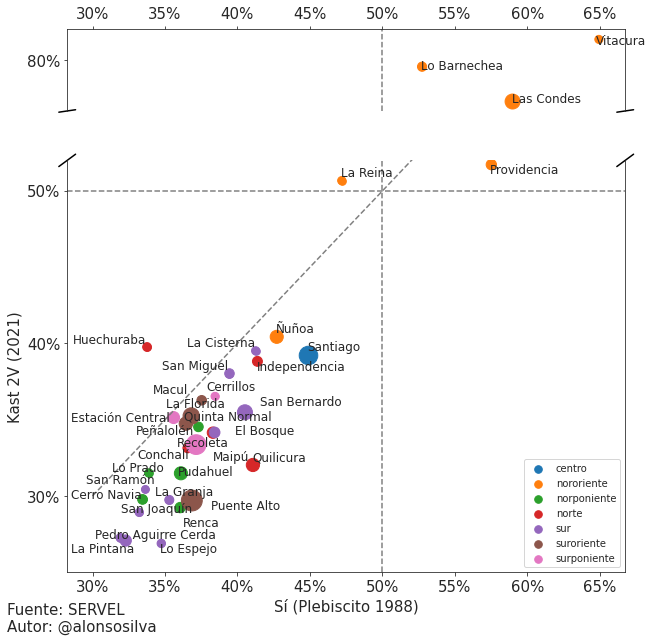

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(10,10), gridspec_kw={'height_ratios': [1, 5]})
for i, sector in enumerate(sorted(df_aux["sector"].unique())):
  data_aux = df_aux[df_aux["sector"]==sector]
  ax2.scatter(data_aux["% Sí"], data_aux["% Kast"], color=f"C{i}", s=86017/1500, label=f"{sector}")
  ax1.scatter(data_aux["% Sí"], data_aux["% Kast"], color=f"C{i}", s=data_aux["poblacion"]/1500)
  ax2.scatter(data_aux["% Sí"], data_aux["% Kast"], color=f"C{i}", s=data_aux["poblacion"]/1500)
ax1.axvline(50, color="gray", linestyle="dashed")
ax2.axvline(50, color="gray", linestyle="dashed")
ax2.axhline(50, color="gray", linestyle="dashed")
ax1.plot(np.arange(30,66), np.arange(30,66), color="gray", linestyle="dashed")
ax2.plot(np.arange(30,66), np.arange(30,66), color="gray", linestyle="dashed")

ax1.set_ylim(72,85)
ax2.set_ylim(25,52)
texts1 = [ax1.annotate(txt, (df_aux["% Sí"].iloc[i], df_aux["% Kast"].iloc[i]), textcoords="offset points", xytext=(-1,1), fontsize="large") for i, txt in enumerate(df_aux.index)]
texts2 = [ax2.annotate(txt, (df_aux["% Sí"].iloc[i], df_aux["% Kast"].iloc[i]), textcoords="offset points", xytext=(-1,1), fontsize="large") for i, txt in enumerate(df_aux.index)]
adjust_text(texts1+texts2)
# ticks
ax1.set_yticks([10*i for i in np.arange(8,9)])
ax1.set_yticklabels([f"{10*i}%" for i in np.arange(8,9)])
ax2.set_xticks([5*i for i in np.arange(6,14)])
ax2.set_xticklabels([f"{5*i}%" for i in np.arange(6,14)])
ax2.set_yticks([10*i for i in np.arange(3,6)])
ax2.set_yticklabels([f"{10*i}%" for i in np.arange(3,6)])

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
ax2.legend()
ax2.set_xlabel("Sí (Plebiscito 1988)", fontsize=15)
ax2.set_ylabel("Kast 2V (2021)", fontsize=15)
plt.annotate('Fuente: SERVEL\nAutor: @alonsosilva', (0,0), (-60,-30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=15)
plt.savefig('servel.svg', bbox_inches='tight', format='svg')
# plt.show()

In [ ]:
from google.colab import files
files.download(f"servel.svg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>